In [1]:
import pandas as pd
from io import StringIO
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
columns = ['RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba','Fe','Type']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
                 names=columns, header=None)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
# X, y = df.iloc[::1], df.iloc[::1]
# X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3)

In [4]:
# mms = MinMaxScaler()
# X_train_norm = mms.fit_transform(X_train)
# X_test_norm = mms.transform(X_test)

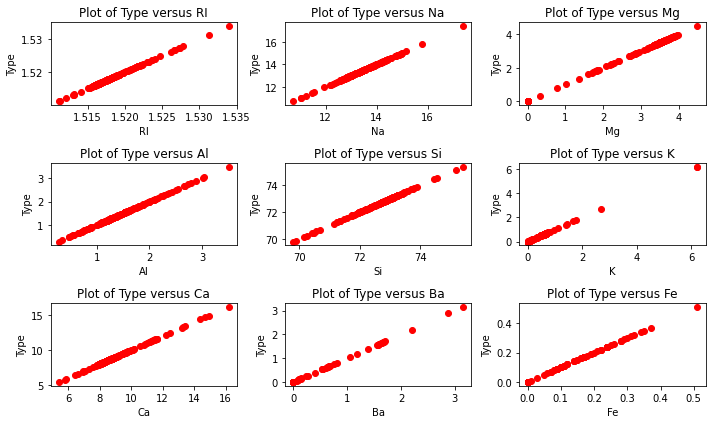

In [5]:
def scatterplot(x, y, x_label="", y_label="", title="", color = "r", yscale_log=False):

# Create the plot object with a sub plot layout
    _, ax = plt.subplots(3,3,figsize=(10,6))
    plt.tight_layout()


    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    for i in range(3):
      for j in range(3):
        ax[i][j].scatter(x[columns[i*3+j]], y[columns[i*3+j]], color = color)
        if yscale_log == True:
          ax[i][j].set_yscale('log')

        # Label the axes and provide a title
        s='Plot of Type versus '+columns[i*3+j]
        ax[i][j].set_title(s)
        ax[i][j].set_xlabel(columns[i*3+j])
        ax[i][j].set_ylabel('Type')
        plt.tight_layout()
        
plt.show(scatterplot(df.iloc[::1], df.iloc[::1]))

Based on the analysis and visualizations performed, what would be the top 3 features in terms of their importance to the classification process?
Based on the analysis the top 3 features are the Na, Mg and Al

In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [8]:
X = df[['RI', 'Na', 'Mg', 'Al','Si', 'K', 'Ca', 'Ba','Fe', 'Type']].values
ohe = ColumnTransformer([('anyname',OneHotEncoder(), [0])],remainder='passthrough')
print(ohe.fit_transform(X))

  (0, 146)	1.0
  (0, 178)	13.64
  (0, 179)	4.49
  (0, 180)	1.1
  (0, 181)	71.78
  (0, 182)	0.06
  (0, 183)	8.75
  (0, 186)	1.0
  (1, 81)	1.0
  (1, 178)	13.89
  (1, 179)	3.6
  (1, 180)	1.36
  (1, 181)	72.73
  (1, 182)	0.48
  (1, 183)	7.83
  (1, 186)	1.0
  (2, 29)	1.0
  (2, 178)	13.53
  (2, 179)	3.55
  (2, 180)	1.54
  (2, 181)	72.99
  (2, 182)	0.39
  (2, 183)	7.78
  (2, 186)	1.0
  (3, 84)	1.0
  :	:
  (210, 181)	73.06
  (210, 183)	8.4
  (210, 184)	1.59
  (210, 186)	7.0
  (211, 142)	1.0
  (211, 178)	14.36
  (211, 180)	2.02
  (211, 181)	73.42
  (211, 183)	8.44
  (211, 184)	1.64
  (211, 186)	7.0
  (212, 39)	1.0
  (212, 178)	14.38
  (212, 180)	1.94
  (212, 181)	73.61
  (212, 183)	8.48
  (212, 184)	1.57
  (212, 186)	7.0
  (213, 62)	1.0
  (213, 178)	14.23
  (213, 180)	2.08
  (213, 181)	73.36
  (213, 183)	8.62
  (213, 184)	1.67
  (213, 186)	7.0


### Task 1: 

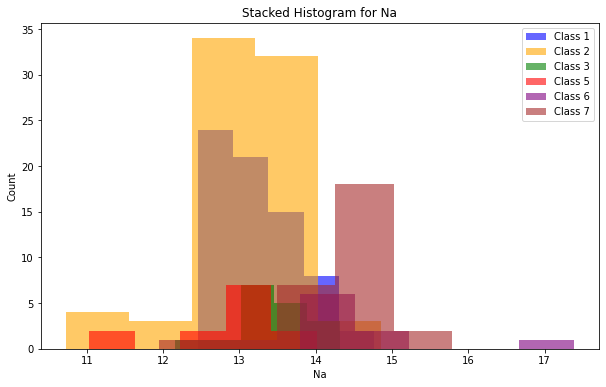

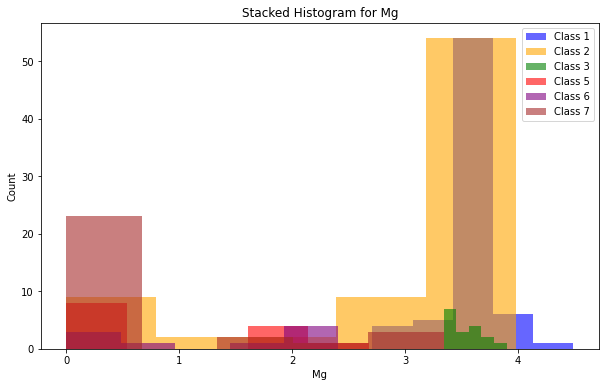

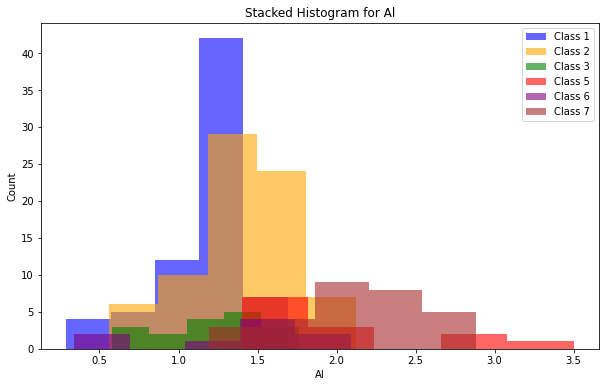

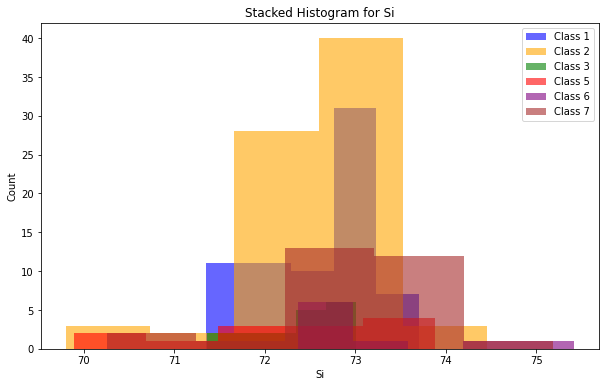

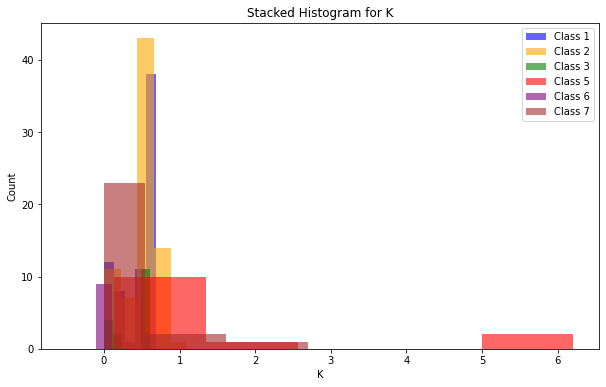

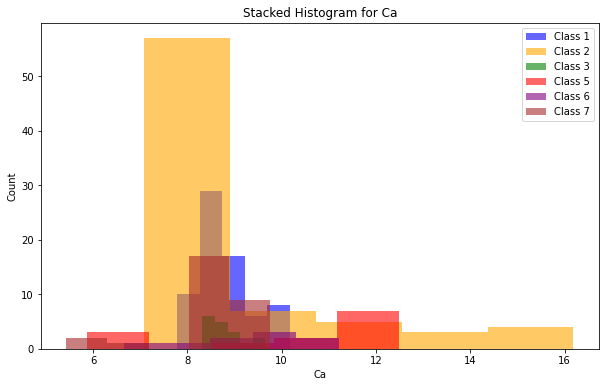

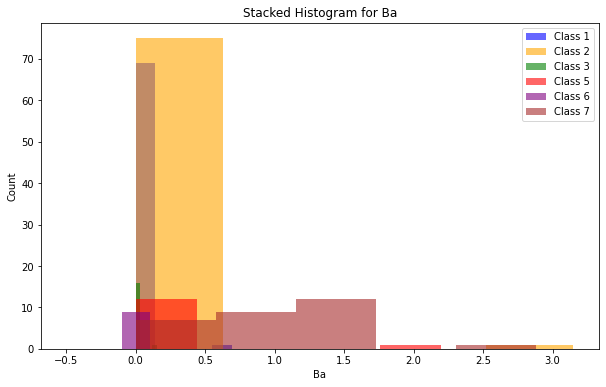

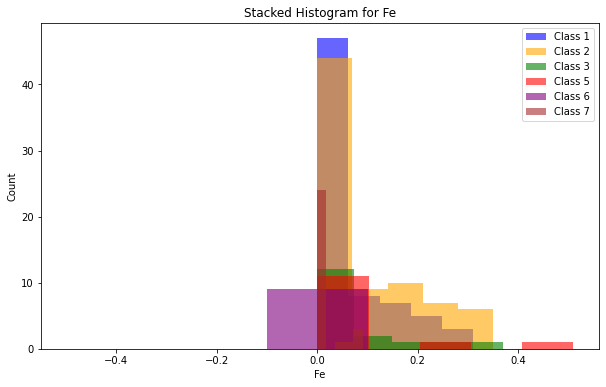

In [9]:
# Define the number of bins
num_bins = 5

# Create a list of colors for each class
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Iterate over each feature (excluding 'Id' and 'Type')
for feature in df.columns[1:-1]:
    # Create a stacked histogram for each feature
    plt.figure(figsize=(10, 6))
    for class_val, color in zip(df['Type'].unique(), colors):
        # Filter the data for the current class
        class_data = df[df['Type'] == class_val][feature]
        
        # Plot the histogram for the current class
        plt.hist(class_data, bins=num_bins, alpha=0.6, color=color, label=f'Class {class_val}')
    
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Stacked Histogram for {feature}')
    plt.legend()
    
    # Display the histogram
    plt.show()

### Task 2

In [10]:
num_bins = 5

# Create a new column to represent the bin ranges for the Mg feature
df['Mg_bins'] = pd.cut(df['Mg'], num_bins)

# Create the 2-way table using crosstab
table_2way = pd.crosstab(df['Mg_bins'], df['Type'])
print(table_2way)

Type                1   2   3  5  6   7
Mg_bins                                
(-0.00449, 0.898]   0   9   0  8  4  23
(0.898, 1.796]      0   2   0  2  1   1
(1.796, 2.694]      0   2   0  3  4   2
(2.694, 3.592]     42  40  12  0  0   3
(3.592, 4.49]      28  23   5  0  0   0


In [11]:
num_bins = 3

# Create a new column to represent the bin ranges for the Mg feature
df['Mg_bins'] = pd.cut(df['Mg'], num_bins)

# Create the 2-way table using crosstab
table_2way = pd.crosstab(df['Mg_bins'], df['Type'])
print(table_2way)

Type                1   2   3  5  6   7
Mg_bins                                
(-0.00449, 1.497]   0  11   0  8  4  23
(1.497, 2.993]      4   8   0  5  5   3
(2.993, 4.49]      66  57  17  0  0   3


<AxesSubplot:ylabel='Frequency'>

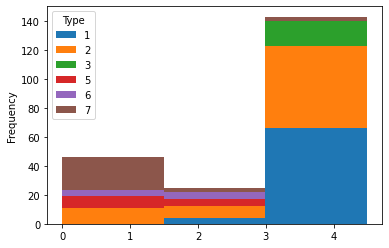

In [12]:
df2Mg = df.pivot(columns='Type', values='Mg')
df2Mg.plot.hist(stacked=True, bins=3)

Based on the above chart it's evident that the range for 3 bins lies in : 3.55 to 4.49

### Task 3

In [13]:
bin_ranges = [0, 1.5]
Mg_ind = columns.index('Mg')
v2_1 = df.loc[(df["Mg"] >= bin_ranges[0]) & (df["Mg"] <= bin_ranges[1])]

# define lists
Mg1 = []
Mg2 = []
Mg3 = []
Al = []
K = []
Type = []

# loop over dataframe
for i in range(len(df)):
    row = df.iloc[i]
    Mg = row['Mg']
    # populate Mg1 with Mg value for each row
    # if row doesn't exist in v2_1, populate Mg1 with original Mg value
    if (Mg >= bin_ranges[0]) & (Mg <= bin_ranges[1]):
        Mg1.append(Mg)
    else:
        Mg1.append(Mg)
        
    # populate Mg2 and Mg3 with median of bin range containing the class 
    # that has the biggest count after excluding the majority class in the partition v2_1
    Al.append(row['Al'])
    K.append(row['K'])
    Type.append(row['Type'])
    class_counts = v2_1['Type'].value_counts().sort_index() # count occurences of each type
    max_without_majority = 0
    median_val = 0
    
    for key, value in class_counts.items():
        if (max_without_majority < value) and (key != 1): # first check for max without majority class
            max_without_majority = value
            median_val = v2_1[v2_1['Type'] == key]['Mg'].median() # get the median of the new majority

# populate Mg2 and Mg3 with the calulated median val
    Mg2.append(median_val)
    Mg3.append(median_val)

# create new df with derived features
cols = ['Mg1', 'Mg2', 'Mg3', 'Al', 'K', 'Type']
df1 = pd.DataFrame(list(zip(Mg1, Mg2, Mg3, Al, K, Type)), columns=cols)  
df1

,Mg1,Mg2,Mg3,Al,K,Type
0,4.49,0.0,0.0,1.10,0.06,1
1,3.60,0.0,0.0,1.36,0.48,1
2,3.55,0.0,0.0,1.54,0.39,1
3,3.69,0.0,0.0,1.29,0.57,1
4,3.62,0.0,0.0,1.24,0.55,1
...,...,...,...,...,...,...
209,0.00,0.0,0.0,2.88,0.08,7
210,0.00,0.0,0.0,1.99,0.00,7
211,0.00,0.0,0.0,2.02,0.00,7
212,0.00,0.0,0.0,1.94,0.00,7


In [14]:
bin_ranges = [1.5, 3]
Mg_ind = columns.index('Mg')
v2_2 = df.loc[(df["Mg"] >= bin_ranges[0]) & (df["Mg"] <= bin_ranges[1])]

# define lists
Mg1 = []
Mg2 = []
Mg3 = []
Al = []
K = []
Type = []

# loop over dataframe
for i in range(len(df)):
    row = df.iloc[i]
    Mg = row['Mg']
    # populate Mg1 with Mg value for each row
    # if row doesn't exist in v2_2, populate Mg1 with original Mg value
    if (Mg >= bin_ranges[0]) & (Mg <= bin_ranges[1]):
        Mg1.append(Mg)
    else:
        Mg1.append(Mg)
        
    # populate Mg2 and Mg3 with median of bin range containing the class 
    # that has the biggest count after excluding the majority class in the partition v2_2
    Al.append(row['Al'])
    K.append(row['K'])
    Type.append(row['Type'])
    class_counts = v2_2['Type'].value_counts().sort_index() # count occurences of each type
    max_without_majority = 0
    median_val = 0
    
    for key, value in class_counts.items():
        if (max_without_majority < value) and (key != 1): # first check for max without majority class
            max_without_majority = value
            median_val = v2_2[v2_2['Type'] == key]['Mg'].median() # get the median of the new majority

# populate Mg2 and Mg3 with the calulated median val
    Mg2.append(median_val)
    Mg3.append(median_val)

# create new df with derived features
cols = ['Mg1', 'Mg2', 'Mg3', 'Al', 'K', 'Type']
df2 = pd.DataFrame(list(zip(Mg1, Mg2, Mg3, Al, K, Type)), columns=cols)  
df2

,Mg1,Mg2,Mg3,Al,K,Type
0,4.49,2.805,2.805,1.10,0.06,1
1,3.60,2.805,2.805,1.36,0.48,1
2,3.55,2.805,2.805,1.54,0.39,1
3,3.69,2.805,2.805,1.29,0.57,1
4,3.62,2.805,2.805,1.24,0.55,1
...,...,...,...,...,...,...
209,0.00,2.805,2.805,2.88,0.08,7
210,0.00,2.805,2.805,1.99,0.00,7
211,0.00,2.805,2.805,2.02,0.00,7
212,0.00,2.805,2.805,1.94,0.00,7


In [15]:
bin_ranges = [3, 4.5]
Mg_ind = columns.index('Mg')
v2_3 = df.loc[(df["Mg"] >= bin_ranges[0]) & (df["Mg"] <= bin_ranges[1])]

# define lists
Mg1 = []
Mg2 = []
Mg3 = []
Al = []
K = []
Type = []

# loop over dataframe
for i in range(len(df)):
    row = df.iloc[i]
    Mg = row['Mg']
    # populate Mg1 with Mg value for each row
    # if row doesn't exist in v2_3, populate Mg1 with original Mg value
    if (Mg >= bin_ranges[0]) & (Mg <= bin_ranges[1]):
        Mg1.append(Mg)
    else:
        Mg1.append(Mg)
        
    # populate Mg2 and Mg3 with median of bin range containing the class 
    # that has the biggest count after excluding the majority class in the partition v2_3
    Al.append(row['Al'])
    K.append(row['K'])
    Type.append(row['Type'])
    class_counts = v2_3['Type'].value_counts().sort_index() # count occurences of each type
    max_without_majority = 0
    median_val = 0
    
    for key, value in class_counts.items():
        if (max_without_majority < value) and (key != 1): # first check for max without majority class
            max_without_majority = value
            median_val = v2_3[v2_3['Type'] == key]['Mg'].median() # get the median of the new majority

# populate Mg2 and Mg3 with the calulated median val
    Mg2.append(median_val)
    Mg3.append(median_val)

# create new df with derived features
cols = ['Mg1', 'Mg2', 'Mg3', 'Al', 'K', 'Type']
df3 = pd.DataFrame(list(zip(Mg1, Mg2, Mg3, Al, K, Type)), columns=cols)  
df3

,Mg1,Mg2,Mg3,Al,K,Type
0,4.49,3.57,3.57,1.10,0.06,1
1,3.60,3.57,3.57,1.36,0.48,1
2,3.55,3.57,3.57,1.54,0.39,1
3,3.69,3.57,3.57,1.29,0.57,1
4,3.62,3.57,3.57,1.24,0.55,1
...,...,...,...,...,...,...
209,0.00,3.57,3.57,2.88,0.08,7
210,0.00,3.57,3.57,1.99,0.00,7
211,0.00,3.57,3.57,2.02,0.00,7
212,0.00,3.57,3.57,1.94,0.00,7


### Task 4

In [16]:
pdListDf = [df1, df2, df2]  # List of your dataframes combined
df_4 = pd.concat(pdListDf)

df_4

,Mg1,Mg2,Mg3,Al,K,Type
0,4.49,0.000,0.000,1.10,0.06,1
1,3.60,0.000,0.000,1.36,0.48,1
2,3.55,0.000,0.000,1.54,0.39,1
3,3.69,0.000,0.000,1.29,0.57,1
4,3.62,0.000,0.000,1.24,0.55,1
...,...,...,...,...,...,...
209,0.00,2.805,2.805,2.88,0.08,7
210,0.00,2.805,2.805,1.99,0.00,7
211,0.00,2.805,2.805,2.02,0.00,7
212,0.00,2.805,2.805,1.94,0.00,7


In [17]:
X = df.drop(['Type', 'Mg_bins'], axis=1)
y = df['Type']

In [18]:
X_mg, y_mg = df_4.drop('Type', axis=1), df_4['Type']
X_train_mg, X_test_mg, y_train_mg, y_test_mg =train_test_split(X_mg, y_mg,stratify=y_mg,test_size=0.3)
X_train, X_test, y_train, y_test =train_test_split(X, y,stratify=y,test_size=0.3)

In [19]:
scaler = MinMaxScaler()
X_train_mg = scaler.fit_transform(X_train_mg)
X_test_mg = scaler.transform(X_test_mg)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

clf_mg = LogisticRegression()
clf_mg.fit(X_train_mg, y_train_mg)

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [21]:
print("Accuracy original data:", clf.score(X_test, y_test))
print("Accuracy processed Mg data:", clf_mg.score(X_test_mg, y_test_mg))

Accuracy original data: 0.5230769230769231
Accuracy processed Mg data: 0.6217616580310881


In [22]:
cm = confusion_matrix(y_test, clf.predict(X_test))
cm_mg = confusion_matrix(y_test_mg, clf_mg.predict(X_test_mg))

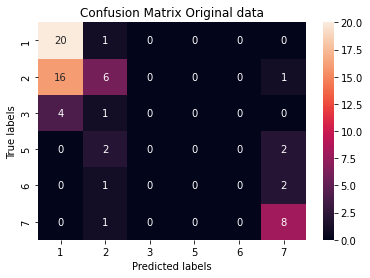

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Original data');
ax.xaxis.set_ticklabels(clf.classes_); ax.yaxis.set_ticklabels(clf.classes_);

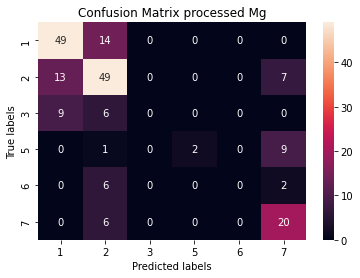

In [24]:
ax= plt.subplot()
sns.heatmap(cm_mg, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix processed Mg');
ax.xaxis.set_ticklabels(clf_mg.classes_); ax.yaxis.set_ticklabels(clf_mg.classes_);

### Task 5

In [25]:
num_bins = 3

# Create a new column to represent the bin ranges for the Mg feature
df['Al_bins'] = pd.cut(df['Al'], num_bins)

# Create the 2-way table using crosstab
table_2way = pd.crosstab(df['Al_bins'], df['Type'])
print(table_2way)

Type            1   2   3   5  6   7
Al_bins                             
(0.287, 1.36]  60  30  12   0  3   3
(1.36, 2.43]   10  46   5  10  6  19
(2.43, 3.5]     0   0   0   3  0   7


In [26]:
bin_ranges = [0.287, 1.36]
Al_ind = columns.index('Al')
v2_1 = df.loc[(df["Al"] >= bin_ranges[0]) & (df["Al"] <= bin_ranges[1])]

# define lists
Al1 = []
Al2 = []
Al3 = []
K = []
Type = []

# loop over dataframe
for i in range(len(df)):
    row = df.iloc[i]
    Al = row['Al']
    # populate Mg1 with Mg value for each row
    # if row doesn't exist in v2_1, populate Mg1 with original Mg value
    if (Al >= bin_ranges[0]) & (Al <= bin_ranges[1]):
        Al1.append(Al)
    else:
        Al1.append(Al)
        
    # populate Mg2 and Mg3 with median of bin range containing the class 
    # that has the biggest count after excluding the majority class in the partition v2_1
    K.append(row['K'])
    Type.append(row['Type'])
    class_counts = v2_1['Type'].value_counts().sort_index() # count occurences of each type
    max_without_majority = 0
    median_val = 0
    
    for key, value in class_counts.items():
        if (max_without_majority < value) and (key != 1): # first check for max without majority class
            max_without_majority = value
            median_val = v2_1[v2_1['Type'] == key]['Al'].median() # get the median of the new majority

# populate Mg2 and Mg3 with the calulated median val
    Al2.append(median_val)
    Al3.append(median_val)

# create new df with derived features
cols = ['Al1', 'Al2', 'Al3', 'K', 'Type']
df5 = pd.DataFrame(list(zip(Al1, Al2, Al3, K, Type)), columns=cols)  
df5

,Al1,Al2,Al3,K,Type
0,1.10,1.175,1.175,0.06,1
1,1.36,1.175,1.175,0.48,1
2,1.54,1.175,1.175,0.39,1
3,1.29,1.175,1.175,0.57,1
4,1.24,1.175,1.175,0.55,1
...,...,...,...,...,...
209,2.88,1.175,1.175,0.08,7
210,1.99,1.175,1.175,0.00,7
211,2.02,1.175,1.175,0.00,7
212,1.94,1.175,1.175,0.00,7


In [27]:
bin_ranges = [1.36, 2.43]
Al_ind = columns.index('Al')
v2_2 = df.loc[(df["Al"] >= bin_ranges[0]) & (df["Al"] <= bin_ranges[1])]

# define lists
Al1 = []
Al2 = []
Al3 = []
K = []
Type = []

# loop over dataframe
for i in range(len(df)):
    row = df.iloc[i]
    Al = row['Al']
    # populate Mg1 with Mg value for each row
    # if row doesn't exist in v2_2, populate Mg1 with original Mg value
    if (Al >= bin_ranges[0]) & (Al <= bin_ranges[1]):
        Al1.append(Al)
    else:
        Al1.append(Al)
        
    # populate Mg2 and Mg3 with median of bin range containing the class 
    # that has the biggest count after excluding the majority class in the partition v2_2
    K.append(row['K'])
    Type.append(row['Type'])
    class_counts = v2_2['Type'].value_counts().sort_index() # count occurences of each type
    max_without_majority = 0
    median_val = 0
    
    for key, value in class_counts.items():
        if (max_without_majority < value) and (key != 1): # first check for max without majority class
            max_without_majority = value
            median_val = v2_2[v2_2['Type'] == key]['Al'].median() # get the median of the new majority

# populate Mg2 and Mg3 with the calulated median val
    Al2.append(median_val)
    Al3.append(median_val)

# create new df with derived features
cols = ['Al1', 'Al2', 'Al3', 'K', 'Type']
df6 = pd.DataFrame(list(zip(Al1, Al2, Al3, K, Type)), columns=cols)  
df6

,Al1,Al2,Al3,K,Type
0,1.10,1.54,1.54,0.06,1
1,1.36,1.54,1.54,0.48,1
2,1.54,1.54,1.54,0.39,1
3,1.29,1.54,1.54,0.57,1
4,1.24,1.54,1.54,0.55,1
...,...,...,...,...,...
209,2.88,1.54,1.54,0.08,7
210,1.99,1.54,1.54,0.00,7
211,2.02,1.54,1.54,0.00,7
212,1.94,1.54,1.54,0.00,7


In [28]:
bin_ranges = [2.43, 3.5]
Al_ind = columns.index('Al')
v2_3 = df.loc[(df["Al"] >= bin_ranges[0]) & (df["Al"] <= bin_ranges[1])]

# define lists
Al1 = []
Al2 = []
Al3 = []
K = []
Type = []

# loop over dataframe
for i in range(len(df)):
    row = df.iloc[i]
    Al = row['Al']
    # populate Mg1 with Mg value for each row
    # if row doesn't exist in v2_3, populate Mg1 with original Mg value
    if (Al >= bin_ranges[0]) & (Al <= bin_ranges[1]):
        Al1.append(Al)
    else:
        Al1.append(Al)
        
    # populate Mg2 and Mg3 with median of bin range containing the class 
    # that has the biggest count after excluding the majority class in the partition v2_3
    K.append(row['K'])
    Type.append(row['Type'])
    class_counts = v2_3['Type'].value_counts().sort_index() # count occurences of each type
    max_without_majority = 0
    median_val = 0
    
    for key, value in class_counts.items():
        if (max_without_majority < value) and (key != 1): # first check for max without majority class
            max_without_majority = value
            median_val = v2_3[v2_3['Type'] == key]['Al'].median() # get the median of the new majority

# populate Mg2 and Mg3 with the calulated median val
    Al2.append(median_val)
    Al3.append(median_val)

# create new df with derived features
cols = ['Al1', 'Al2', 'Al3', 'K', 'Type']
df7 = pd.DataFrame(list(zip(Al1, Al2, Al3, K, Type)), columns=cols)  
df7

,Al1,Al2,Al3,K,Type
0,1.10,2.68,2.68,0.06,1
1,1.36,2.68,2.68,0.48,1
2,1.54,2.68,2.68,0.39,1
3,1.29,2.68,2.68,0.57,1
4,1.24,2.68,2.68,0.55,1
...,...,...,...,...,...
209,2.88,2.68,2.68,0.08,7
210,1.99,2.68,2.68,0.00,7
211,2.02,2.68,2.68,0.00,7
212,1.94,2.68,2.68,0.00,7


### Task 6

In [29]:
pdListDf = [df5, df6, df7]  # List of your dataframes combined
df_Al = pd.concat(pdListDf)

df_8 = pd.concat([df_4[['Mg1', 'Mg2', 'Mg3']], df_Al], axis=1)
df_8

,Mg1,Mg2,Mg3,Al1,Al2,Al3,K,Type
0,4.49,0.000,0.000,1.10,1.175,1.175,0.06,1
1,3.60,0.000,0.000,1.36,1.175,1.175,0.48,1
2,3.55,0.000,0.000,1.54,1.175,1.175,0.39,1
3,3.69,0.000,0.000,1.29,1.175,1.175,0.57,1
4,3.62,0.000,0.000,1.24,1.175,1.175,0.55,1
...,...,...,...,...,...,...,...,...
209,0.00,2.805,2.805,2.88,2.680,2.680,0.08,7
210,0.00,2.805,2.805,1.99,2.680,2.680,0.00,7
211,0.00,2.805,2.805,2.02,2.680,2.680,0.00,7
212,0.00,2.805,2.805,1.94,2.680,2.680,0.00,7


### Task 7

In [30]:
X_final = df_8.drop(['Type'], axis=1)
y_final = df_8['Type']

In [31]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, stratify=y_final, test_size=0.3)

In [32]:
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

In [33]:
clf_final = LogisticRegression()
clf_final.fit(X_train_final, y_train_final)

LogisticRegression()

In [34]:
print("Accuracy processed Final data:", clf_final.score(X_test_final, y_test_final))

Accuracy processed Final data: 0.5906735751295337


In [35]:
cm_final = confusion_matrix(y_test_final, clf_final.predict(X_test_final))

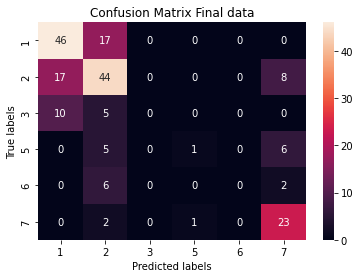

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_final, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Final data');
ax.xaxis.set_ticklabels(clf_final.classes_); ax.yaxis.set_ticklabels(clf_final.classes_);

### Task 8

In [37]:
df_4

,Mg1,Mg2,Mg3,Al,K,Type
0,4.49,0.000,0.000,1.10,0.06,1
1,3.60,0.000,0.000,1.36,0.48,1
2,3.55,0.000,0.000,1.54,0.39,1
3,3.69,0.000,0.000,1.29,0.57,1
4,3.62,0.000,0.000,1.24,0.55,1
...,...,...,...,...,...,...
209,0.00,2.805,2.805,2.88,0.08,7
210,0.00,2.805,2.805,1.99,0.00,7
211,0.00,2.805,2.805,2.02,0.00,7
212,0.00,2.805,2.805,1.94,0.00,7


In [38]:
clf_4 = LogisticRegression(random_state=4)
clf_4.fit(X_train_mg, y_train_mg)

LogisticRegression(random_state=4)

In [39]:
df_4['pred'] = clf_4.predict(df_4.drop(['Type'], axis=1))

In [40]:
df_4_1 = df_4[df_4['pred']==1]
df_4_2 = df_4[df_4['pred']==2]

In [41]:
X_train_41, X_test_41, y_train_41, y_test_41 = train_test_split(df_4_1.drop(['Type', 'pred'], axis=1), df_4_1['Type'], stratify=df_4_1['Type'], test_size=0.3, random_state=1)
X_train_42, X_test_42, y_train_42, y_test_42 = train_test_split(df_4_2.drop(['Type', 'pred'], axis=1), df_4_2['Type'], stratify=df_4_2['Type'], test_size=0.3, random_state=1)

scaler = MinMaxScaler()
X_train_41 = scaler.fit_transform(X_train_41)
X_test_41 = scaler.transform(X_test_41)

scaler = MinMaxScaler()
X_train_42 = scaler.fit_transform(X_train_42)
X_test_42 = scaler.transform(X_test_42)

In [42]:
clf_41 = LogisticRegression()
clf_41.fit(X_train_41, y_train_41)

clf_42 = LogisticRegression()
clf_42.fit(X_train_42, y_train_42)

LogisticRegression()

In [43]:
print("Accuracy processed 4_1 data:", clf_41.score(X_test_41, y_test_41))
print("Accuracy processed 4_2 data:", clf_42.score(X_test_42, y_test_42))

Accuracy processed 4_1 data: 0.6503496503496503
Accuracy processed 4_2 data: 0.375


In [44]:
cm_41 = confusion_matrix(y_test_41, clf_41.predict(X_test_41))
cm_42 = confusion_matrix(y_test_42, clf_42.predict(X_test_42))

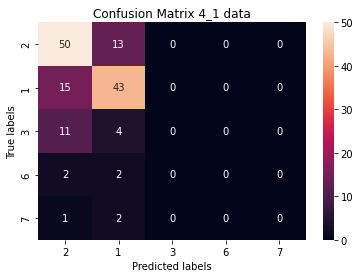

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_41, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix 4_1 data');
ax.xaxis.set_ticklabels(y_test_41.unique()); ax.yaxis.set_ticklabels(y_test_41.unique());

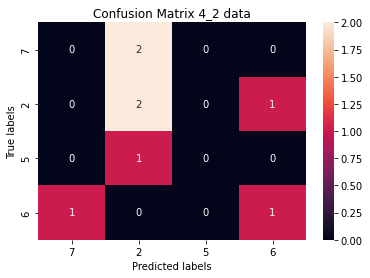

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_42, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix 4_2 data');
ax.xaxis.set_ticklabels(y_test_42.unique()); ax.yaxis.set_ticklabels(y_test_42.unique());

In [47]:
cm_mg[0][0] = cm_41[0][0]
cm_mg[0][1] = 0
cm_mg[1][0] = 0
cm_mg[1][1] = cm_42[1][1]
cm_mg[1][5] = 0
cm_mg[2][2] = cm_mg[2][0]
cm_mg[2][0] = 0

In [50]:
print("Accuracy original data:", clf.score(X_test, y_test))
print("Accuracy final data:", cm_mg.diagonal().sum()/cm_mg.sum())

Accuracy original data: 0.5230769230769231
Accuracy final data: 0.7345132743362832


### Task 9

Accuracy increase from 0.52 to 0.73 ~=21%